# 2. Load Dog_Bites_data dataset

## _. Import library

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data_pd/Dog_Bites_Data.csv')
df.head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224


In [9]:
df.columns

Index(['UniqueID', 'DateOfBite', 'Species', 'Breed', 'Age', 'Gender',
       'SpayNeuter', 'Borough', 'ZipCode'],
      dtype='object')

## 2.1. Check nan value in dataset which selected columns

In [3]:
df.isna().sum()

UniqueID          0
DateOfBite        0
Species           0
Breed          2218
Age           11221
Gender            0
SpayNeuter        0
Borough           0
ZipCode        5858
dtype: int64

## 2.2. Remove missing Data in 'Age' column (11221 missing values)

In [5]:
df = df.dropna(subset=['Age'])
df.isna().sum()

UniqueID         0
DateOfBite       0
Species          0
Breed           91
Age              0
Gender           0
SpayNeuter       0
Borough          0
ZipCode       1480
dtype: int64

## 2.3. Perform data cleaning and data transformation by converting all Age data to numerical type

In [8]:
df['Age'].unique()

array(['4', '4Y', '5Y', '3Y', '7', '6', '5', '8', '11', '3', '13Y', '2',
       '10M', '1', '9M', '9', '10', '8M', '13', '4M', '10W', '7-8M', '12',
       '15', '7 YRS', '11M', '5 YRS', '2 YRS', '8 YRS', '3 YRS', '10 YRS',
       '7M', '14', '5M', '2YRS', '3 MONS', '4 M', '12 YRS', '6 YRS',
       '3 1/2 YRS', '16', '6M', '2.5', '2Y', '2M', '9 YRS', '19', '3M',
       '4 YRS', '2022-06-07T00:00:00.000', '13 yrs', '14 YRS', '13M',
       '11WKS', '11MOS', '2022-03-04T00:00:00.000', '4-6MOS', '4m', '14M',
       '3 MTHS', '6Y', '10Y', '1.5', '2-3MOS', '2022-03-05T00:00:00.000',
       '2,4,5,& 6', '13 YRS', '2022-05-06T00:00:00.000', '9 MONS', '20',
       '3 MOS', '5 MOS', '10 yrs', '4MO', '6MO', '2 MONS.', '1 YRS',
       '8 MONS', '12WKSKS', '11 MONS', '10 MOS', '10+',
       '2022-02-04T00:00:00.000', '7 MOS', '11 MOS', '3YRS', '16W',
       '7MOS', '11-12YRS', '3Q', '8Y', '7Y', '8MTHS', '8W', '16 MONS',
       '7 mons', '4.5', '21M', '04M', '3.5', '4 MONS', '17', '7YRS',
       '68 

In [18]:
# Removing non-numeric characters and convert the column to numeric type
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Check values are ourlier
df['Age'].value_counts()

Age
2.0     1624
3.0     1504
1.0     1365
4.0     1178
5.0     1040
6.0      795
7.0      655
8.0      569
9.0      375
10.0     361
11.0     242
12.0     188
13.0     140
14.0      75
15.0      51
16.0      22
17.0       9
2.5        7
1.5        4
3.5        3
19.0       3
20.0       2
1.6        2
4.5        2
1.3        2
4.6        2
1.8        1
6.5        1
3.6        1
2.6        1
21.0       1
0.2        1
15.5       1
0.6        1
41.0       1
10.5       1
Name: count, dtype: int64

In [21]:
df.isna().sum()

UniqueID         0
DateOfBite       0
Species          0
Breed           91
Age           1212
Gender           0
SpayNeuter       0
Borough          0
ZipCode       1480
dtype: int64

In [22]:
df = df.dropna(subset=['Age'])

In [33]:
# Replace invalid age values (e.g., negative ages or euqal 0, more than 120) with NaN
df['Age'] = df['Age'].astype(int)
df[df['Age'] <= 0] = np.nan
df[df['Age'] > 120] = np.nan

C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_13192\2806348132.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df[df['Age'] <= 0] = np.nan


In [35]:
df = df.dropna(subset=['Age'])
df.isna().sum()

UniqueID         0
DateOfBite       0
Species          0
Breed           74
Age              0
Gender           0
SpayNeuter       0
Borough          0
ZipCode       1316
dtype: int64

In [36]:
# Displaying cleaned Age column statistics to verify the result
print(df['Age'].describe())

count    10228.000000
mean         4.813258
std          3.306679
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         41.000000
Name: Age, dtype: float64


## 2.4. Perform Ourlier detection on Age

In [39]:
n = df['Age'].count()
ls = df.sort_values(by='Age', ascending=True)['Age'].to_list()

Q1 = np.percentile(ls, 25)
Q3 = np.percentile(ls, 75)
IQR = Q3 - Q1
print(f"Q1 is: {Q1}\nQ3 is: {Q3}\nIQR is: {IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = [x for x in ls if x < lower_bound or x > upper_bound]

print("lower_bound: ", lower_bound)
print("upper_bound: ", upper_bound)
print("Arrays: ", ls)
print("Outliers: ", outliers)

Q1 is: 2.0
Q3 is: 7.0
IQR is: 5.0
lower_bound:  -5.5
upper_bound:  14.5
Arrays:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

## 2.5. Create a box-plot for the same

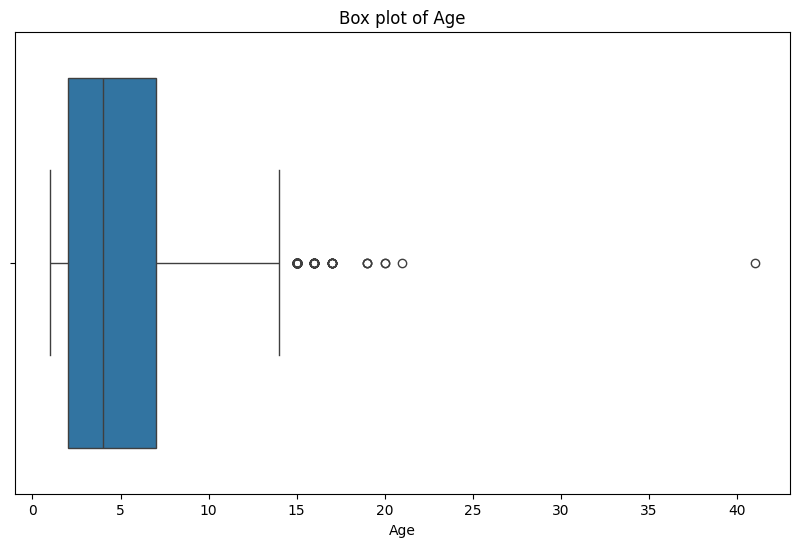

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Age'], orient='h')
plt.title('Box plot of Age')
plt.xlabel('Age')
plt.show()